#MSPA PREDICT 400

##Discussion Topic: Week 3 Solving Minimization and Maximization Problems

###Introduction

This document presents the results of the third weeks discussion topic for the Masters of Science in Predictive Analytics course: PREDICT 400. This assessment required the student to take a system of equations and extend it into a minimization or maximization problem by adding an extra variable (or variables) and constraints(s). The student was then required to solve the problem using graphical and/or simplex method(s).

###Minimization/Maximization Problem

For this assessment, I formed an optimization function with constraints based on the system of linear equations which I used as part of the second weeks discussion topic. The original system of equations is shown below.

$x-y+\frac{29}{100}z=\frac{-169}{100}\quad(1)$

$\frac{-17}{20}x+y+\frac{-1}{5}z=\frac{243}{100}\quad(2)$

$\frac{-47}{20}x+\frac{119}{100}y+z=\frac{-161}{50}\quad(3)$

Optimize according to 'z'.

$z=\frac{47}{20}x+\frac{-119}{100}y+\frac{-161}{50}$

$z=\frac{47}{20}(y+\frac{-29}{100}z+\frac{-169}{100})+\frac{-119}{100}(\frac{1}{5}z+\frac{17}{20}x+\frac{243}{100})+\frac{-161}{50}$

$z=\frac{23500y-10115x-100832}{19195}$

Utilize the existing system of equations to form constraints for 'x' and 'y', whilst enforcing an additional maximum constraint on 'y'.

$y\ge\frac{17}{20}x+\frac{243}{100}$

$y\le\frac{493697479}{250000000}x+\frac{-2705882353}{1000000000}$

$y\le10$

###Graphical Method

The optimization problem and inequality constraints are formalized below:

$Find\:the\:maximum\:value\:of:$

$z=\frac{23500y-10115x-100832}{19195}$

$Subject\:to\:the\:constraints:$

$y\ge\frac{17}{20}x+\frac{243}{100}$

$y\le\frac{493697479}{250000000}x+\frac{-2705882353}{1000000000}$

$y\le10$

Plot the inequality constrains.

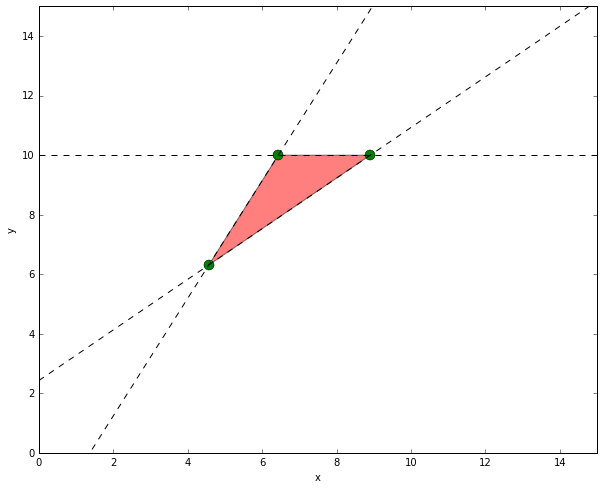

In [13]:
#Source: http://stackoverflow.com/questions/17576508/python-matplotlib-drawing-linear-inequality-functions

import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol
%matplotlib inline

#Define inequality constraints w.r.t. 'y'.
def f1(x):
    return (17/20)*x+(243/100)
def f2(x):
    return (493697479/250000000)*x+(-2705882353/1000000000)
def f3(x):
    return 0*x+10

#Use SymPy to solve defined inequality constaints.
#see: http://docs.sympy.org/dev/modules/solvers/solvers.html
#Set 'x' symbol for SymPy to solve for.
x = Symbol('x')
#Solve 'x' for roots of each inequality constraint pair.
x1, =  solve(f1(x)-f2(x))
x2, =  solve(f1(x)-f3(x))
x3, =  solve(f2(x)-f3(x))

#Set 'x' to each solved root, and solve for 'y'.
y1 = f1(x1)
y2 = f1(x2)
y3 = f2(x3)

#Use matplotlib to plot markers at root coordinates (x,y) for each inequality constraint pair.
#see: http://matplotlib.org/api/pyplot_api.html
#Set plot size upfront.
plt.figure(figsize=(10,8))
#Define marker position and size.
plt.plot(x1,y1,'go',markersize=10)
plt.plot(x2,y2,'go',markersize=10)
plt.plot(x3,y3,'go',markersize=10)

#Fill the plot area defined by each inequality constraint pair.
plt.fill([x1,x2,x3,x1],[y1,y2,y3,y1],'red',alpha=0.5)

#Set 'x' to capture values within x-axis range, and solve for 'y'.
xr = np.linspace(0,15,100)
y1r = f1(xr)
y2r = f2(xr)
y3r = f3(xr)

#Plot lines for each inequality constraint.
plt.plot(xr,y1r,'k--')
plt.plot(xr,y2r,'k--')
plt.plot(xr,y3r,'k--')

#Finalize plot.
plt.xlim(0,15)
plt.ylim(0,15)
plt.ylabel("y")
plt.xlabel("x")
plt.show()

In [2]:
import pandas as pd
import numpy as np

y_values = [y1, y2, y3]
x_values = [x1, x2, x3]
op_values = np.array([y_values, x_values, range(0,3)])

df_optimization = pd.DataFrame(op_values.T, columns = ["y", "x", "z"])

for index, row in df_optimization.iterrows():
    x = row["x"]
    y = row["y"]
    z = (-10115*x+23500*y-100832)/19195
    row["z"] = z

df_optimization

,y,x,z
0,6.31116921920377,4.56608143435738,0.0674427164763631
1,10.0000000000000,8.90588235294118,2.29669184683511
2,10.0000000000000,6.43404255311176,3.59925290832376


In [3]:
print("Maximum value of z: ", df_optimization['z'][2])
print("when y: ", df_optimization['y'][2])
print("and x: ", df_optimization['x'][2])

Maximum value of z:  3.59925290832376
when y:  10.0000000000000
and x:  6.43404255311176
